In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [2]:
trainset = pd.read_csv('mnist_train.csv', header= None)
testset = pd.read_csv('mnist_test.csv', header= None)

In [3]:
trainset.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Label columns
trainset[trainset.columns[0]].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

In [5]:
testset.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
trainset.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [7]:
trainset.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            775, 776, 777, 778, 779, 780, 781, 782, 783, 784],
           dtype='int64', length=785)

In [8]:
trainset.shape

(60000, 785)

In [9]:
testset.shape

(10000, 785)

## Splitting data set by creating a true label columns and dropping it from original data set

In [10]:
Y_train = trainset[trainset.columns[0]]
Y_test = testset[testset.columns[0]]

In [11]:
del trainset[trainset.columns[0]]
del testset[testset.columns[0]]

In [12]:
#trainset
#testset

In [13]:
##### Scaling training data set #####
trainset = trainset.apply(lambda x : x/255)

In [14]:
trainset.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Singular Value Decomposition on the training data set

In [15]:
svd_train = TruncatedSVD(n_components=87, n_iter=7, random_state=2019)
svd_train.fit(trainset)
# Perform dimensionality reduction on trainset.
trainset_svd = svd_train.transform(trainset)
# Reconstruct the training data set
trainset = svd_train.inverse_transform(trainset_svd)

In [16]:
print((svd_train.explained_variance_ratio_).sum())

0.9000212406376144


In [17]:
# Verification of the dimension reduction
trainset_svd.shape

(60000, 87)

In [18]:
print("\n")
print("##### The number of components that explains above 90% of the total variance is 87 #####")
print("\n")
print("##### The variance ratio for these 87 components is :\n {} #####".format(svd_train.explained_variance_ratio_))




##### The number of components that explains above 90% of the total variance is 87 #####


##### The variance ratio for these 87 components is :
 [0.05807749 0.08246405 0.07095205 0.06116264 0.05283004 0.04319133
 0.03626566 0.02910758 0.02878759 0.02363035 0.02124947 0.02050351
 0.01716084 0.0170527  0.01590455 0.01489269 0.01363987 0.01295398
 0.01189454 0.01152786 0.01066264 0.01006965 0.00954502 0.00914597
 0.0088423  0.00839983 0.00814285 0.00786444 0.00744774 0.00690988
 0.00658441 0.00648346 0.00602943 0.00590423 0.00570134 0.00544291
 0.00505801 0.00487873 0.00481469 0.00472645 0.00457282 0.00444925
 0.00420122 0.00398289 0.00385471 0.00375207 0.00362098 0.00351754
 0.0034076  0.00322965 0.00320443 0.00313226 0.00296035 0.00292165
 0.00284227 0.00271769 0.00270339 0.00258772 0.00253797 0.00244797
 0.00240933 0.00239356 0.0023044  0.00221586 0.00213755 0.00207876
 0.00203156 0.00197123 0.0019285  0.00188636 0.00186973 0.00182512
 0.00177514 0.0017492  0.00165702 0.0016367  0.0

## Singular Value Decomposition on the test data set

In [19]:
# Scaling test data set
testset_for_svd = testset.apply(lambda x : x/255)

In [20]:
testset_for_svd.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
svd_test = TruncatedSVD(n_components= 87, n_iter=7, random_state=2019)
svd_test.fit(testset_for_svd)
# Perform dimensionality reduction on testset.
testset_svd = svd_test.transform(testset_for_svd)
# Reconstruct the test data set
testset_reconstruct = svd_test.inverse_transform(testset_svd)

In [22]:
print((svd_test.explained_variance_ratio_).sum())

0.9043960165052434


In [23]:
print("##### The variance ratio for these 87 components is :\n {} #####".format(svd_train.explained_variance_ratio_))

##### The variance ratio for these 87 components is :
 [0.05807749 0.08246405 0.07095205 0.06116264 0.05283004 0.04319133
 0.03626566 0.02910758 0.02878759 0.02363035 0.02124947 0.02050351
 0.01716084 0.0170527  0.01590455 0.01489269 0.01363987 0.01295398
 0.01189454 0.01152786 0.01066264 0.01006965 0.00954502 0.00914597
 0.0088423  0.00839983 0.00814285 0.00786444 0.00744774 0.00690988
 0.00658441 0.00648346 0.00602943 0.00590423 0.00570134 0.00544291
 0.00505801 0.00487873 0.00481469 0.00472645 0.00457282 0.00444925
 0.00420122 0.00398289 0.00385471 0.00375207 0.00362098 0.00351754
 0.0034076  0.00322965 0.00320443 0.00313226 0.00296035 0.00292165
 0.00284227 0.00271769 0.00270339 0.00258772 0.00253797 0.00244797
 0.00240933 0.00239356 0.0023044  0.00221586 0.00213755 0.00207876
 0.00203156 0.00197123 0.0019285  0.00188636 0.00186973 0.00182512
 0.00177514 0.0017492  0.00165702 0.0016367  0.00161434 0.00155021
 0.00147299 0.0014307  0.00142021 0.00141191 0.00139439 0.00135769
 0.0013

In [24]:
### Concatenate Y_test and testset data with the reduced dimension for plotting
testset_svd_plot = np.column_stack((Y_test.values,testset_svd))


In [25]:
testset_svd = pd.DataFrame(testset_svd) # Convert into Data Frame structure
testset_svd_plot = pd.DataFrame(testset_svd_plot)

In [26]:
# Create groups by the digits
digit_groups = testset_svd_plot.groupby(testset_svd_plot.columns[0])

In [27]:
group_0 = digit_groups.get_group(testset_svd_plot.columns[0])
group_1 = digit_groups.get_group(testset_svd_plot.columns[1])
group_2 = digit_groups.get_group(testset_svd_plot.columns[2])
group_3 = digit_groups.get_group(testset_svd_plot.columns[3])
group_4 = digit_groups.get_group(testset_svd_plot.columns[4])
group_5 = digit_groups.get_group(testset_svd_plot.columns[5])
group_6 = digit_groups.get_group(testset_svd_plot.columns[6])
group_7 = digit_groups.get_group(testset_svd_plot.columns[7])
group_8 = digit_groups.get_group(testset_svd_plot.columns[8])
group_9 = digit_groups.get_group(testset_svd_plot.columns[9])

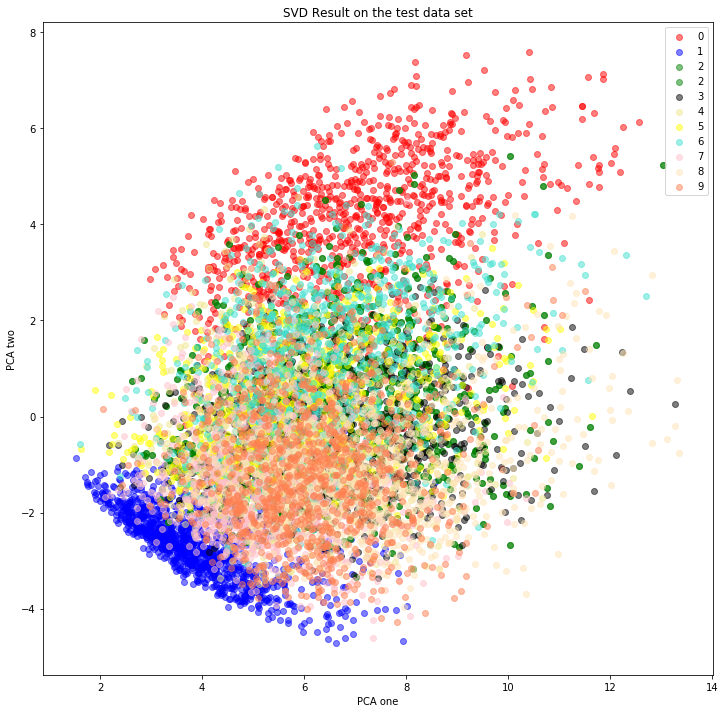

In [28]:
plt.figure(figsize=(12,12))

plt.scatter(group_0[1], group_0[2], color='red', alpha=0.5,label='0')
plt.scatter(group_1[1], group_1[2], color='blue', alpha=0.5,label='1')
plt.scatter(group_2[1], group_2[2], color='green', alpha=0.5,label='2')
plt.scatter(group_2[1], group_2[2], color='green', alpha=0.5,label='2')
plt.scatter(group_3[1], group_3[2], color='black', alpha=0.5,label='3')
plt.scatter(group_4[1], group_4[2], color='khaki', alpha=0.5,label='4')
plt.scatter(group_5[1], group_5[2], color='yellow', alpha=0.5,label='5')
plt.scatter(group_6[1], group_6[2], color='turquoise', alpha=0.5,label='6')
plt.scatter(group_7[1], group_7[2], color='pink', alpha=0.5,label='7')
plt.scatter(group_8[1], group_8[2], color='moccasin', alpha=0.5,label='8')
plt.scatter(group_9[1], group_9[2], color='coral', alpha=0.5,label='9')
plt.title("SVD Result on the test data set")
plt.ylabel('PCA two')
plt.xlabel('PCA one')
plt.legend()
plt.show()


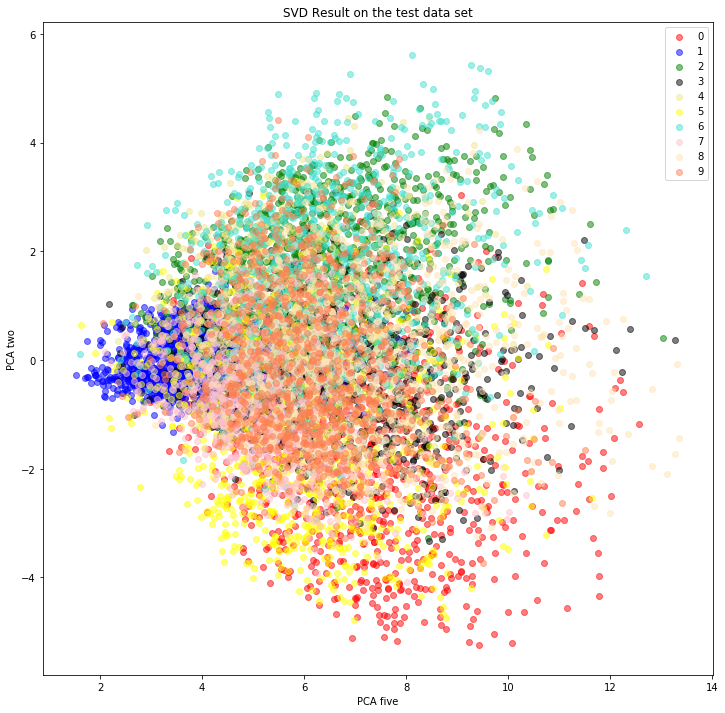

In [29]:
plt.figure(figsize=(12,12))

plt.scatter(group_0[1], group_0[5], color='red', alpha=0.5,label='0')
plt.scatter(group_1[1], group_1[5], color='blue', alpha=0.5,label='1')
plt.scatter(group_2[1], group_2[5], color='green', alpha=0.5,label='2')
plt.scatter(group_3[1], group_3[5], color='black', alpha=0.5,label='3')
plt.scatter(group_4[1], group_4[5], color='khaki', alpha=0.5,label='4')
plt.scatter(group_5[1], group_5[5], color='yellow', alpha=0.5,label='5')
plt.scatter(group_6[1], group_6[5], color='turquoise', alpha=0.5,label='6')
plt.scatter(group_7[1], group_7[5], color='pink', alpha=0.5,label='7')
plt.scatter(group_8[1], group_8[5], color='moccasin', alpha=0.5,label='8')
plt.scatter(group_9[1], group_9[5], color='coral', alpha=0.5,label='9')
plt.title("SVD Result on the test data set")
plt.ylabel('PCA two')
plt.xlabel('PCA five')
plt.legend()
plt.show()


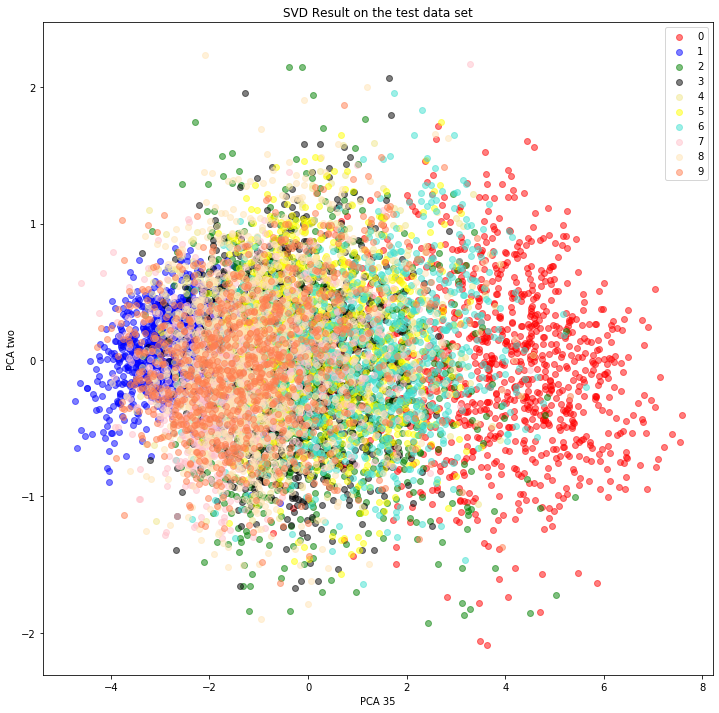

In [30]:
plt.figure(figsize=(12,12))

plt.scatter(group_0[2], group_0[35], color='red', alpha=0.5,label='0')
plt.scatter(group_1[2], group_1[35], color='blue', alpha=0.5,label='1')
plt.scatter(group_2[2], group_2[35], color='green', alpha=0.5,label='2')
plt.scatter(group_3[2], group_3[35], color='black', alpha=0.5,label='3')
plt.scatter(group_4[2], group_4[35], color='khaki', alpha=0.5,label='4')
plt.scatter(group_5[2], group_5[35], color='yellow', alpha=0.5,label='5')
plt.scatter(group_6[2], group_6[35], color='turquoise', alpha=0.5,label='6')
plt.scatter(group_7[2], group_7[35], color='pink', alpha=0.5,label='7')
plt.scatter(group_8[2], group_8[35], color='moccasin', alpha=0.5,label='8')
plt.scatter(group_9[2], group_9[35], color='coral', alpha=0.5,label='9')
plt.title("SVD Result on the test data set")
plt.ylabel('PCA two')
plt.xlabel('PCA 35')
plt.legend()
plt.show()



#### We notice that in the previous plots that TruncatedSVD like PCA and SVD allows to reduce dimensions of the data with a minimum loss of information using eigenvlue methods.

## Splitting data for classifiers

In [31]:
# Splitting the SVD data
X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split(testset_svd,Y_test,test_size = 0.2,random_state = 0)

X_train_svd.shape, X_test_svd.shape, y_train_svd.shape, y_test_svd.shape

((8000, 87), (2000, 87), (8000,), (2000,))

In [32]:
# Splitting the original data without SVD
X_train, X_test, y_train, y_test = train_test_split(testset,Y_test,test_size = 0.2,random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 784), (2000, 784), (8000,), (2000,))

## Generative Classifiers

### KNN

#### knn on the reduced dimensions test data set

In [33]:
%%time
# Create the Classifier
knn_svd = KNeighborsClassifier(n_neighbors=3)
# Train the model
knn_svd.fit(X_train_svd, y_train_svd)
# predict with the model
y_pred_svd = knn_svd.predict(X_test_svd)

CPU times: user 2.37 s, sys: 8.78 ms, total: 2.38 s
Wall time: 2.38 s


In [34]:
print("Accuracy score with the SVD on the data : {} ".format(accuracy_score(y_test_svd, y_pred_svd)))

Accuracy score with the SVD on the data : 0.9615 


In [35]:
print('################### Report #########################')
print(classification_report(y_test_svd,y_pred_svd))

################### Report #########################
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       210
           1       0.98      1.00      0.99       243
           2       0.97      0.97      0.97       199
           3       0.95      0.96      0.95       206
           4       0.98      0.92      0.95       228
           5       0.97      0.95      0.96       166
           6       0.98      0.99      0.99       180
           7       0.94      0.97      0.95       185
           8       0.98      0.93      0.96       195
           9       0.91      0.94      0.92       188

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



#### knn on the original test data set 

In [36]:
%%time
# Create the Classifier
knn = KNeighborsClassifier(n_neighbors=3)
# Train the model
knn.fit(X_train, y_train)
# predict with the model
y_pred = knn.predict(X_test)

CPU times: user 18.7 s, sys: 66.5 ms, total: 18.7 s
Wall time: 18.8 s


In [37]:
print("Accuracy score without reducing of the data : {} ".format(accuracy_score(y_test, y_pred)))

Accuracy score without reducing of the data : 0.957 


In [38]:
print('################### Report #########################')
print(classification_report(y_test,y_pred))

################### Report #########################
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       210
           1       0.95      1.00      0.97       243
           2       0.97      0.96      0.96       199
           3       0.95      0.98      0.96       206
           4       0.98      0.92      0.95       228
           5       0.98      0.96      0.97       166
           6       0.98      1.00      0.99       180
           7       0.91      0.94      0.93       185
           8       0.99      0.91      0.95       195
           9       0.90      0.91      0.90       188

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



##### In the case of the KNN classifier, the accuracy of the classifier for data with dimensions reduction (SVD) is slightly higher than that of data without dimensions reduction. The precision in terms of the score f1 is the same for both cases. However, the learning execution time is much longer (6 times more important) for data without dimensions reduction. This comparison confirms the curse of dimensionality about the KNN classifier.

### Naive Bayes

#### Naive Bayes on the reduced dimensions test data set

In [39]:
%%time
# Create a Gaussian Classifier
nbayes_svd = GaussianNB()
# Train the model using the training sets
nbayes_svd.fit(X_train_svd, y_train_svd)
# Predict labels with the model
y_pred2_svd = nbayes_svd.predict(X_test_svd)

CPU times: user 25.9 ms, sys: 8.74 ms, total: 34.6 ms
Wall time: 36.5 ms


In [40]:
print("Accuracy score with the SVD on the data : {} ".format(accuracy_score(y_test_svd, y_pred2_svd)))

Accuracy score with the SVD on the data : 0.887 


In [41]:
print('################### Report #########################')
print(classification_report(y_test_svd,y_pred2_svd))

################### Report #########################
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       210
           1       0.99      0.96      0.97       243
           2       0.79      0.90      0.85       199
           3       0.86      0.91      0.88       206
           4       0.90      0.86      0.88       228
           5       0.82      0.87      0.85       166
           6       0.93      0.93      0.93       180
           7       0.94      0.83      0.88       185
           8       0.84      0.87      0.85       195
           9       0.82      0.79      0.81       188

    accuracy                           0.89      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.89      0.89      0.89      2000



#### Naive Bayes on the original test data set 

In [42]:
%%time
# Create a Gaussian Classifier
nbayes = GaussianNB()
# Train the model using the training sets
nbayes.fit(X_train, y_train)
# Predict labels with the model
y_pred2 = nbayes.predict(X_test)

CPU times: user 247 ms, sys: 59 ms, total: 306 ms
Wall time: 307 ms


In [43]:
print("Accuracy score with the SVD on the data : {} ".format(accuracy_score(y_test, y_pred2)))

Accuracy score with the SVD on the data : 0.5545 


In [44]:
print('################### Report #########################')
print(classification_report(y_test,y_pred2))

################### Report #########################
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       210
           1       0.74      0.96      0.84       243
           2       0.84      0.27      0.40       199
           3       0.69      0.33      0.45       206
           4       0.76      0.28      0.41       228
           5       0.41      0.04      0.08       166
           6       0.49      0.94      0.64       180
           7       0.89      0.31      0.46       185
           8       0.31      0.55      0.40       195
           9       0.37      0.91      0.53       188

    accuracy                           0.55      2000
   macro avg       0.64      0.54      0.51      2000
weighted avg       0.65      0.55      0.52      2000



##### In the case of the Naive Bayes classifier, the performance in terms of the score f1 and accuracy are significantly higher for data with reduced dimensions than for data without dimensions reduction. In addition, there is a longer learning time for data without reducing dimensions. Here, we realize the importance of reducing the size of data before learning a model in machine learning.

## Discriminative Classifier

#### Multinomial logistic regression on the reduced dimensions test data set

In [45]:
%%time
# Create a multinomial logistic regression classifier
mult_clsf_svd = LogisticRegression(C=400. / len(X_train), multi_class='multinomial', penalty='l1', solver='saga', tol=0.1)
# Train the model using the training sets
mult_clsf_svd.fit(X_train_svd, y_train_svd)
# Predict labels with the model
y_pred3_svd = mult_clsf_svd.predict(X_test_svd)

CPU times: user 136 ms, sys: 7.73 ms, total: 144 ms
Wall time: 168 ms


In [46]:
print("Accuracy score with the SVD on the data : {} ".format(accuracy_score(y_test, y_pred3_svd)))

Accuracy score with the SVD on the data : 0.9075 


In [47]:
print('################### Report #########################')
print(classification_report(y_test,y_pred3_svd))

################### Report #########################
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       210
           1       0.93      0.98      0.95       243
           2       0.91      0.87      0.89       199
           3       0.91      0.92      0.92       206
           4       0.95      0.88      0.91       228
           5       0.88      0.83      0.85       166
           6       0.93      0.97      0.95       180
           7       0.92      0.87      0.89       185
           8       0.84      0.88      0.86       195
           9       0.86      0.88      0.87       188

    accuracy                           0.91      2000
   macro avg       0.91      0.90      0.90      2000
weighted avg       0.91      0.91      0.91      2000



#### Multinomial logistic regression on the test data set without reducing dimensions

In [48]:
%%time
# Create a multinomial logistic regression classifier
mult_clsf = LogisticRegression(C=500. / len(X_train), multi_class='multinomial', penalty='l1', solver='saga', tol=0.1)
# Train the model using the training sets
mult_clsf.fit(X_train, y_train)
# Predict labels with the model
y_pred3 = mult_clsf.predict(X_test)

CPU times: user 1.76 s, sys: 38.6 ms, total: 1.8 s
Wall time: 1.72 s


In [49]:
print("Accuracy score with the SVD on the data : {} ".format(accuracy_score(y_test, y_pred3)))

Accuracy score with the SVD on the data : 0.918 


In [50]:
print('################### Report #########################')
print(classification_report(y_test,y_pred3))

################### Report #########################
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       210
           1       0.96      0.98      0.97       243
           2       0.89      0.90      0.90       199
           3       0.91      0.92      0.92       206
           4       0.95      0.88      0.91       228
           5       0.88      0.84      0.86       166
           6       0.95      0.97      0.96       180
           7       0.93      0.89      0.91       185
           8       0.86      0.91      0.88       195
           9       0.87      0.90      0.88       188

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



##### In the case of discriminative classification, performance in terms of score f1 and accuracy are more important by a factor of 1 for data without dimensions reduction. Including, the execution time is much less important for data without dimensions reduction.